In [2]:
!pip install mofax

In [3]:
import mofax as mfx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

In [5]:
# Load your MOFA model
m = mfx.mofa_model("MOFA_model_final.hdf5")



In [6]:
print(f"""
Samples (rows): {m.shape[0]}
Features (columns): {m.shape[1]}
Groups: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")



Samples (rows): 38
Features (columns): 23265
Groups: -
Views: Clinical, Expression



In [7]:
# Print weights matrix preview
print("HDF5 Group:")
print(m.weights)

print("\nAs numpy array:")
print(m.get_weights()[:3, :5])

print("\nAs DataFrame:")
print(m.get_weights(df=True).iloc[:3, :5])


HDF5 Group:
<HDF5 group "/expectations/W" (2 members)>

As numpy array:
[[-0.91516835 -0.02098982  0.20751982  0.02314862 -0.63231292]
 [-0.72230983  0.00296131  0.45671384  0.08879221 -0.01747636]
 [-0.2462798  -0.01183225 -0.08488864 -0.05105745  0.02786606]]

As DataFrame:
                        Factor1   Factor2   Factor3   Factor4   Factor5
STAGE_AT_PRESENTATION -0.915168 -0.020990  0.207520  0.023149 -0.632313
PRIMARY_SITE          -0.722310  0.002961  0.456714  0.088792 -0.017476
SAMPLE_TYPE           -0.246280 -0.011832 -0.084889 -0.051057  0.027866


/usr/local/lib/python3.11/dist-packages/mofax/plot_weights.py:134: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna({"to_label": False})
/usr/local/lib/python3.11/dist-packages/mofax/plot_weights.py:164: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g = sns.stripplot(


<Axes: title={'center': 'Clinical'}, xlabel='Feature weight'>

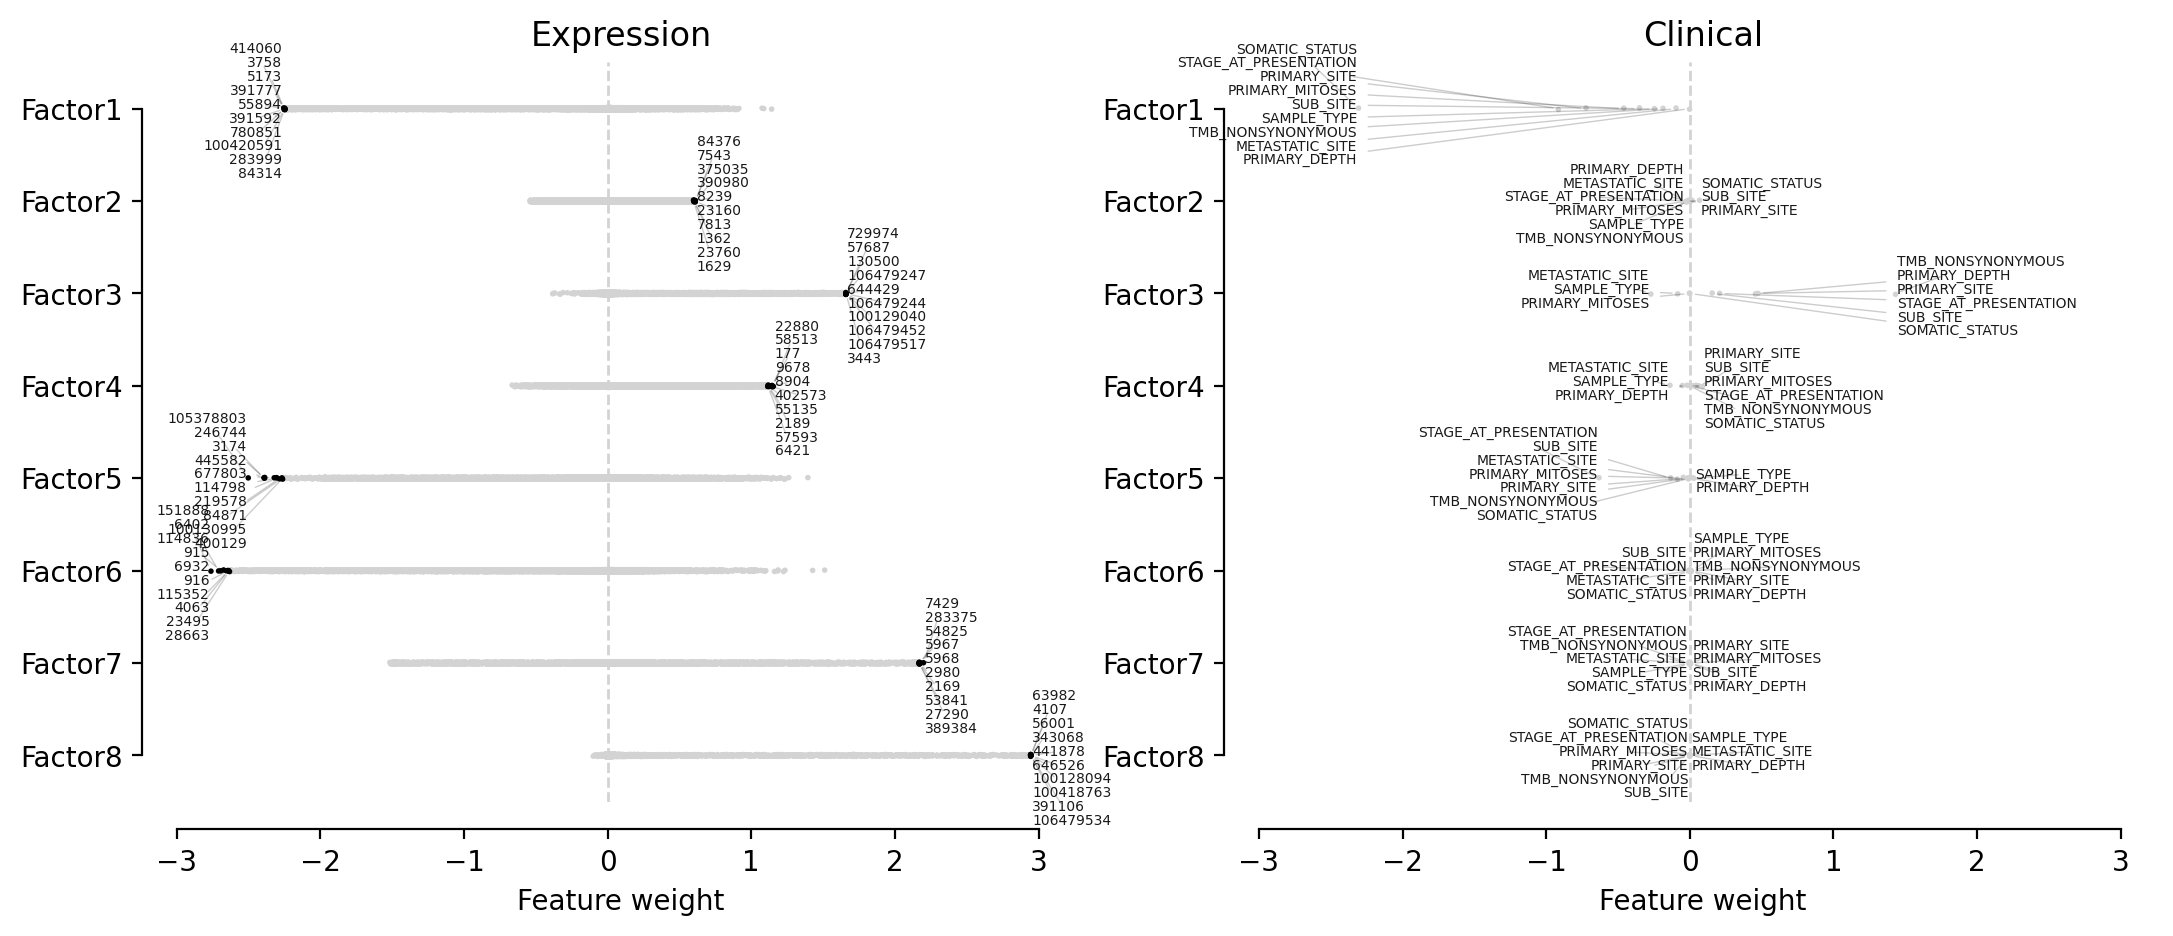

In [7]:
# All factors, each view (like in your sample image)
mfx.plot_weights(m, n_features=10)

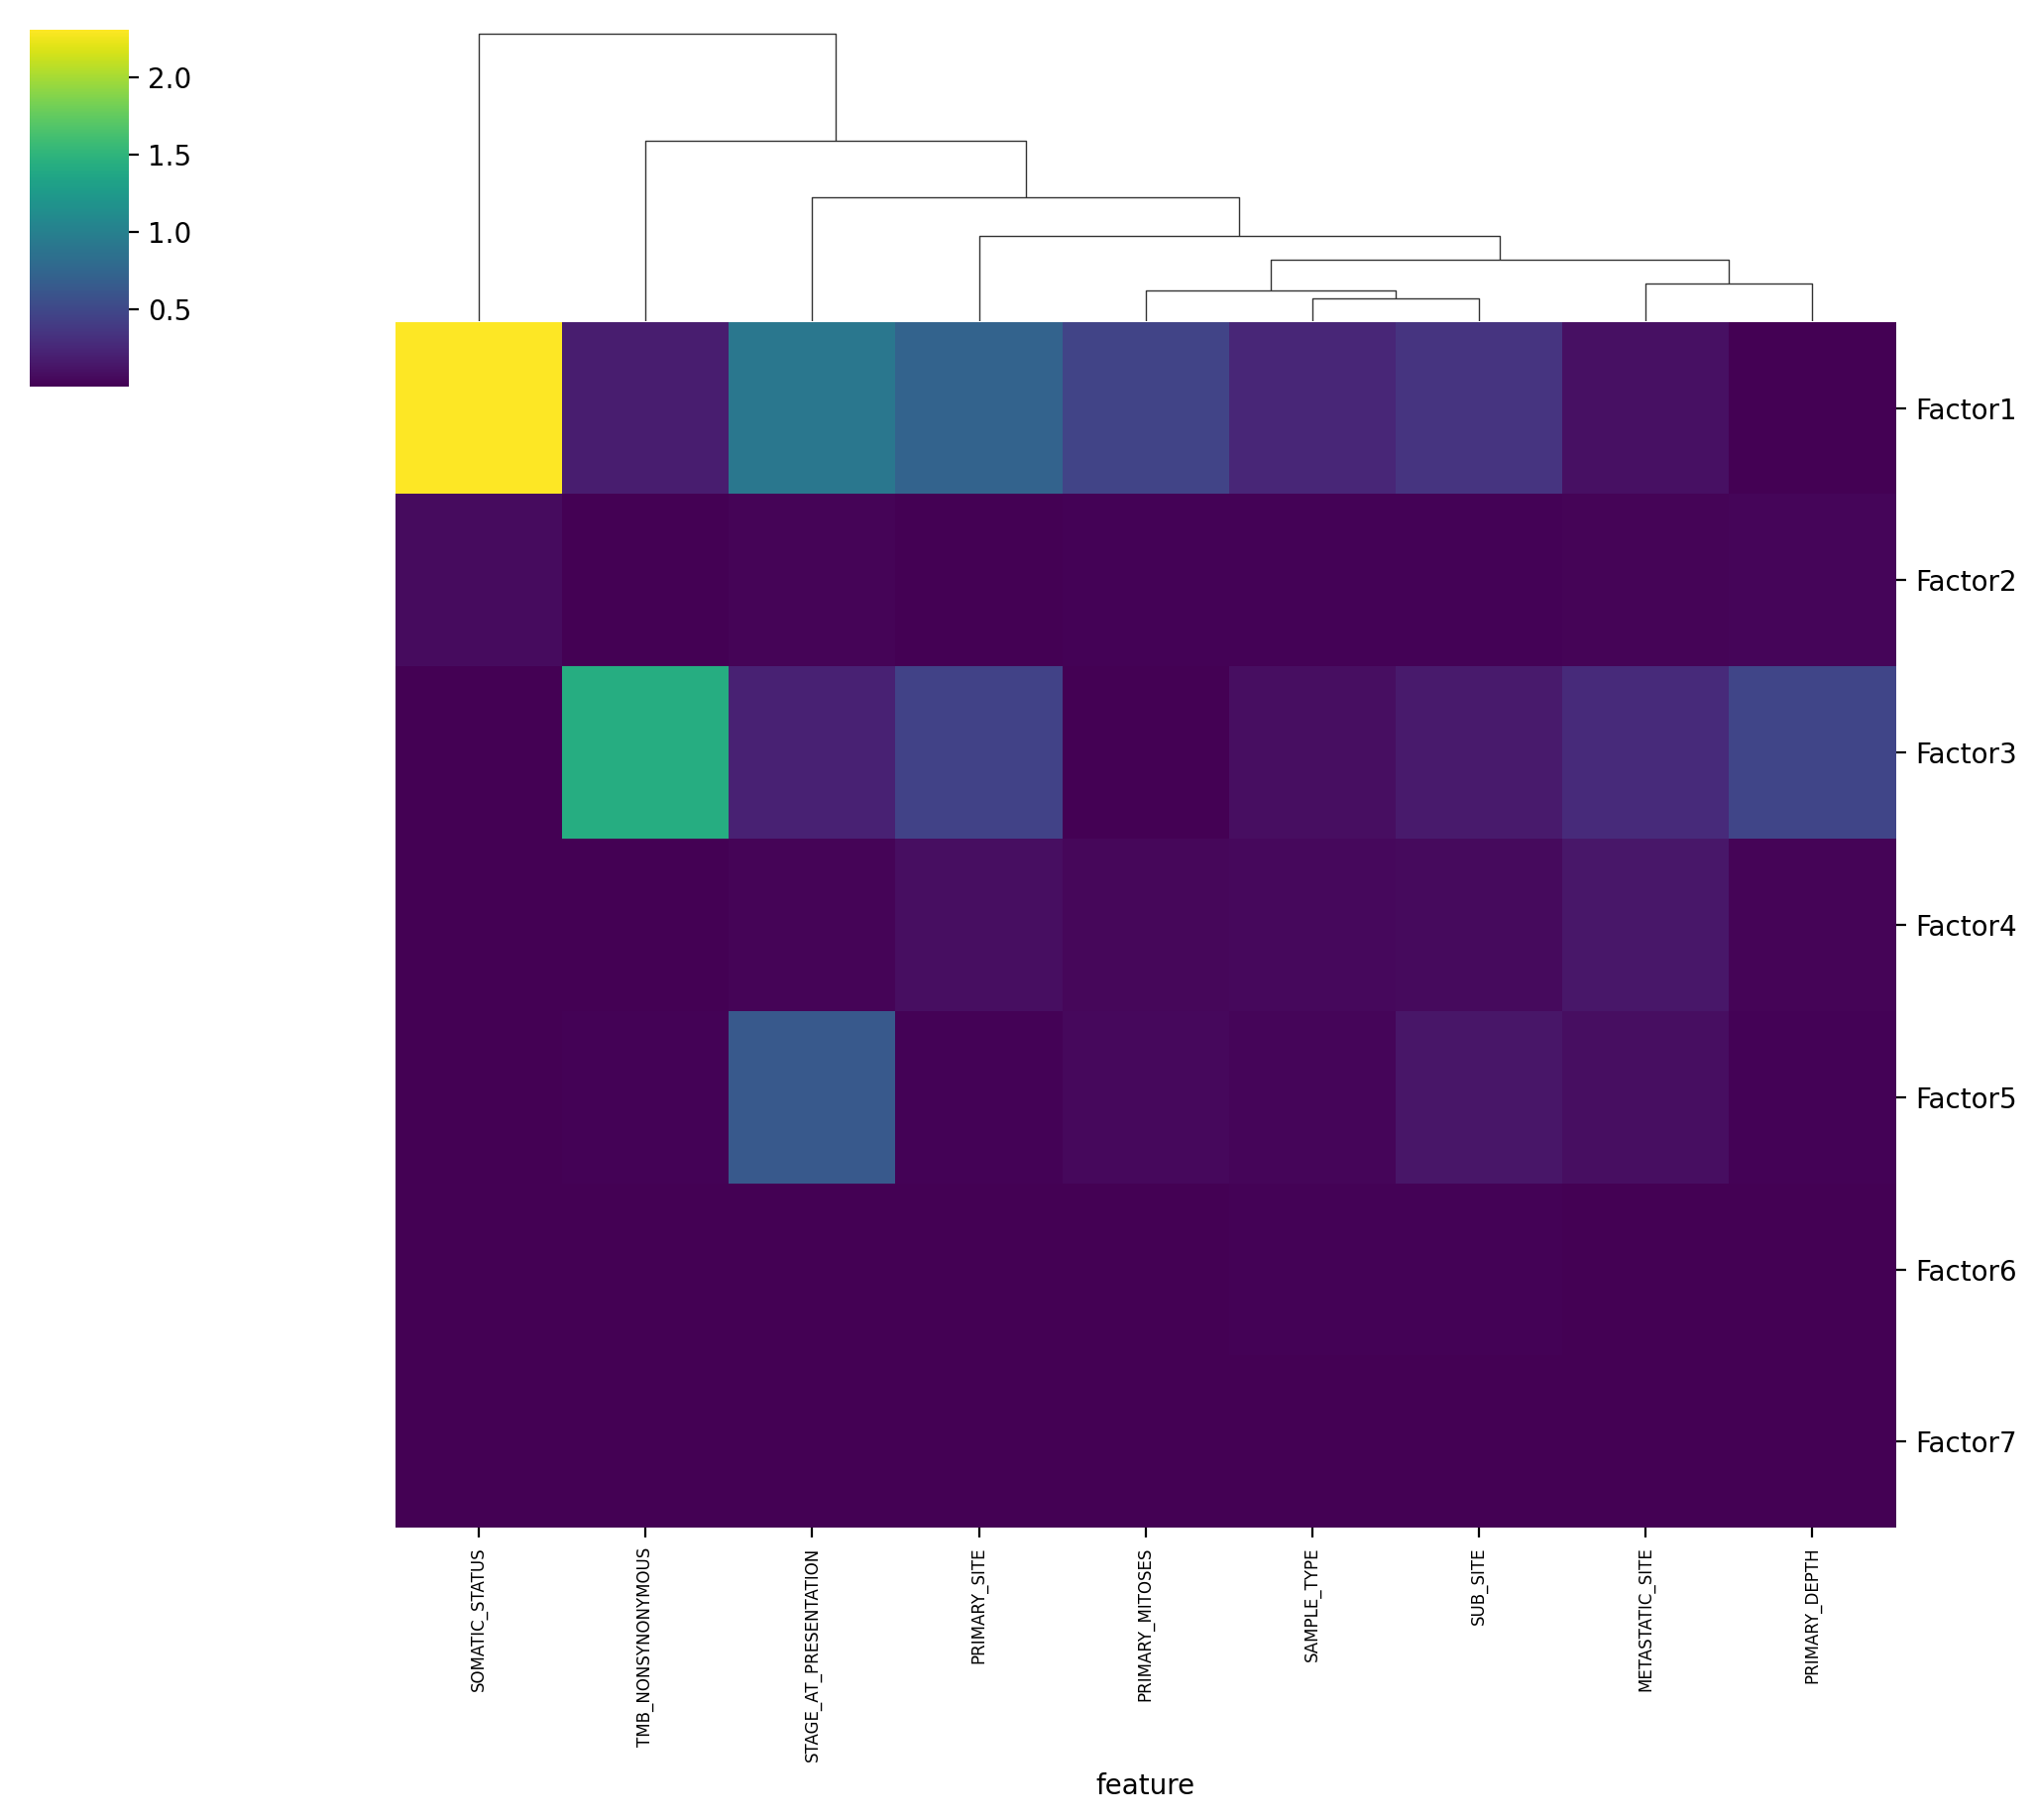

In [18]:
mfx.plot_weights_heatmap(m, n_features=5,
                         factors=range(0, 7),
                         xticklabels_size=6, w_abs=True,
                         cmap="viridis", cluster_factors=False)

/usr/local/lib/python3.11/dist-packages/mofax/plot_weights.py:728: UserWarning: Cannot make a proper colorbar
  warn("Cannot make a proper colorbar")


<Axes: title={'center': 'Clinical'}, xlabel='factor', ylabel='feature'>

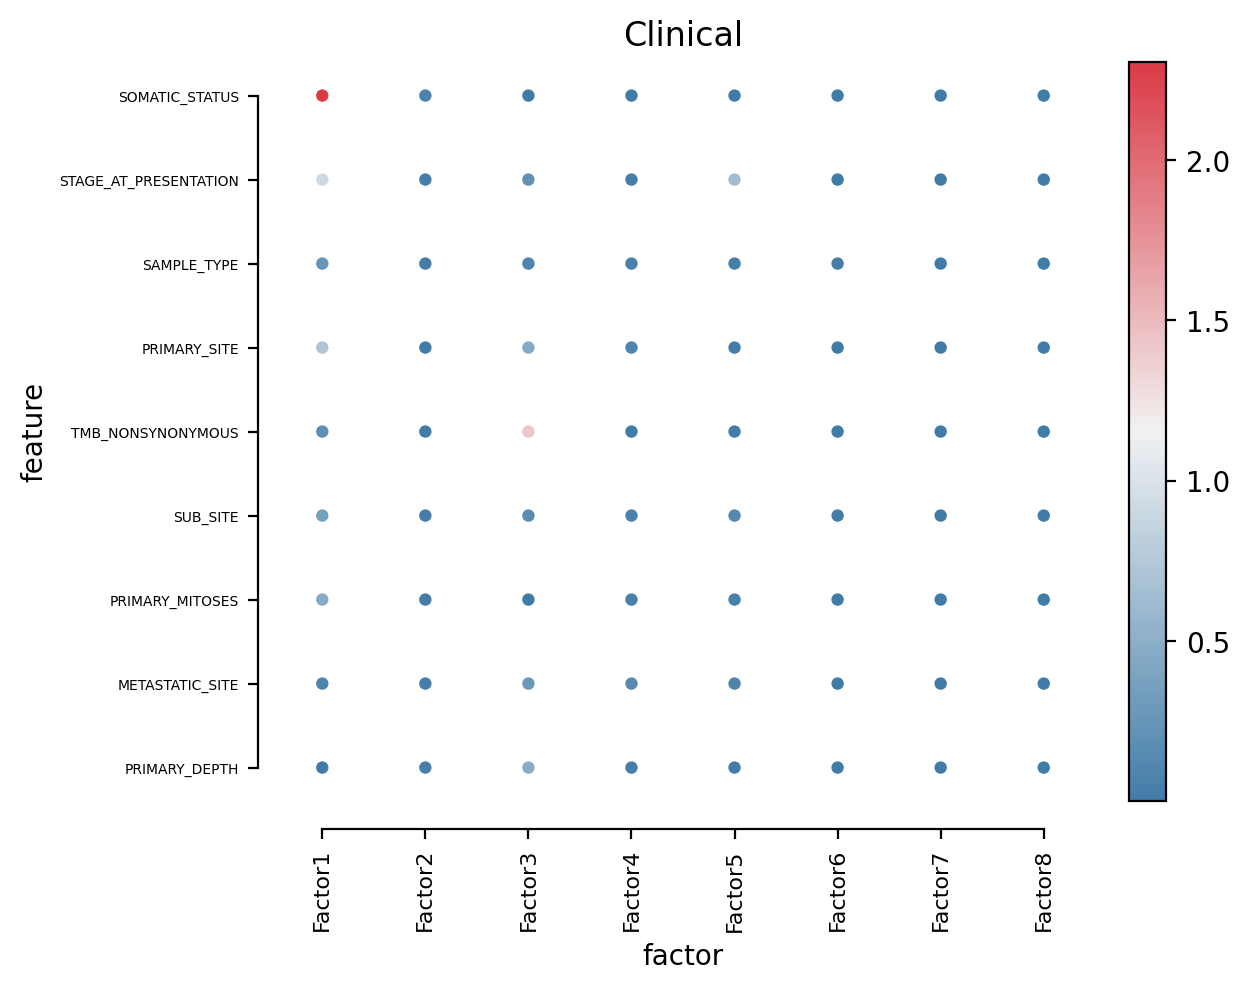

In [19]:
mfx.plot_weights_dotplot(m, n_features=3,
                         w_abs=True,
                         factors=list(range(8)),
                         yticklabels_size=5)

/usr/local/lib/python3.11/dist-packages/mofax/plot_weights.py:728: UserWarning: Cannot make a proper colorbar
  warn("Cannot make a proper colorbar")


<Axes: title={'center': 'Expression'}, xlabel='factor', ylabel='feature'>

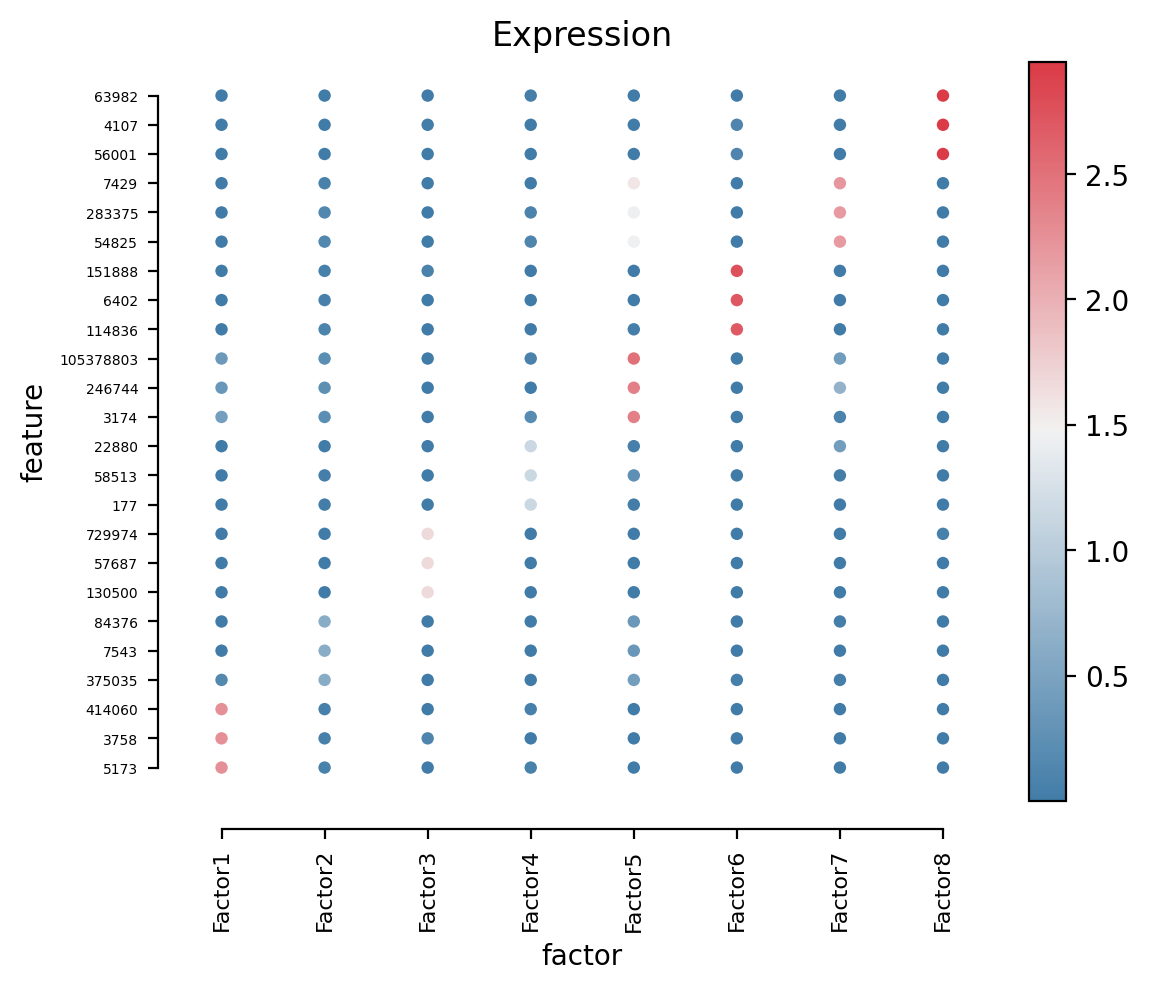

In [20]:
mfx.plot_weights_dotplot(
    m,
    view="Expression",          # 👈 Change this!
    n_features=3,
    w_abs=True,
    factors=list(range(8)),
    yticklabels_size=5
)


<Axes: >

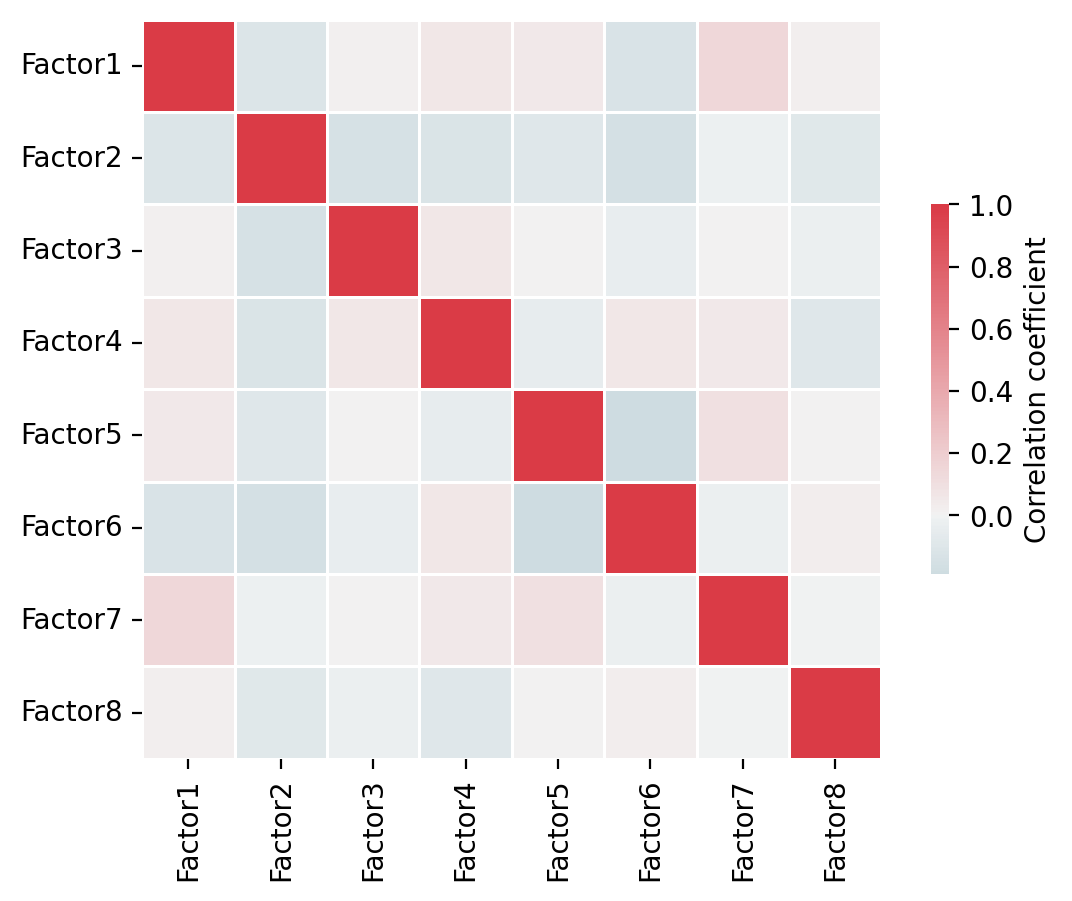

In [14]:
mfx.plot_factors_correlation(m)
